In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
# Import dataset

df = pd.read_csv('C:/Users/phuro/UCSD/ULI/H2H/ULI-UCSD_H2H/LIHTC_analysis/data/cleanLIHTC.csv', index_col=0)
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct,record_stat
0,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60.125469,-149.446060,NaN,NaN,68560.0,02XXXXXXXXX,02XXXXXXXXX,02122001300,2,122,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,X
1,AKA0000X034,YENLO PHASE I AND II,402-451 NORTH YENLO STREET,WASILLA,AK,99654,AK-99-99,61.583096,-149.437637,NaN,NaN,83080.0,02XXXXXXXXX,02XXXXXXXXX,02170000800,2,170,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,37.0,37.0,NaN,NaN,NaN,U
2,AKA19890010,PARK WEST APTS,2012 SANDVIK ST,FAIRBANKS,AK,99709,AK-89-00001,64.851646,-147.803421,1080.0,16750.0,16750.0,02090000600,02090000600,02090000600,2,90,2.0,NaN,83.0,81.0,0.0,41.0,42.0,0.0,0.0,NaN,NaN,NaN,1989,1989.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,83.0,81.0,1.0,NaN,2.0,X
3,AKA19900005,TYSON'S TERRACE,103 BURKHART DR,SITKA,AK,99835,AK-90-00001,57.048874,-135.303024,3040.0,70540.0,70540.0,02220967500,02220000100,02220000100,2,220,2.0,NaN,16.0,16.0,0.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,1990,1990.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16.0,16.0,1.0,NaN,2.0,X
4,AKA19910005,NORTHWOOD APTS,190 PARKWOOD CIR,SOLDOTNA,AK,99669,AK-91-00001,60.489147,-151.073853,2810.0,65345.0,71640.0,02122953200,02122000500,02122000500,2,122,2.0,NaN,23.0,22.0,0.0,23.0,0.0,0.0,0.0,NaN,NaN,NaN,1991,1991.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,23.0,22.0,1.0,NaN,2.0,X


In [3]:
df.drop(columns=['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'record_stat'], inplace=True)

In [4]:
df.dropna(inplace=True)
df.head()

,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct
793,353361.0,40.0,40.0,0.0,10.0,20.0,10.0,0.0,2.0,1.0,40.0,2007,2007.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1057610.0,1236940.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,40.0,40.0,1.0,0.0,2.0
833,846300.0,96.0,96.0,0.0,24.0,48.0,24.0,0.0,2.0,1.0,96.0,2009,2008.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,3691580.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,96.0,96.0,1.0,0.0,2.0
840,444822.0,40.0,40.0,0.0,12.0,28.0,0.0,0.0,2.0,1.0,40.0,2009,2009.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1857970.0,845160.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,40.0,40.0,1.0,0.0,2.0
842,616777.0,56.0,56.0,0.0,12.0,44.0,0.0,0.0,2.0,1.0,56.0,2009,2009.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2550010.0,1292290.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,56.0,56.0,1.0,0.0,1.0
843,200000.0,56.0,56.0,0.0,0.0,56.0,0.0,0.0,2.0,1.0,56.0,2009,2008.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2119730.0,4578970.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,56.0,56.0,1.0,0.0,2.0


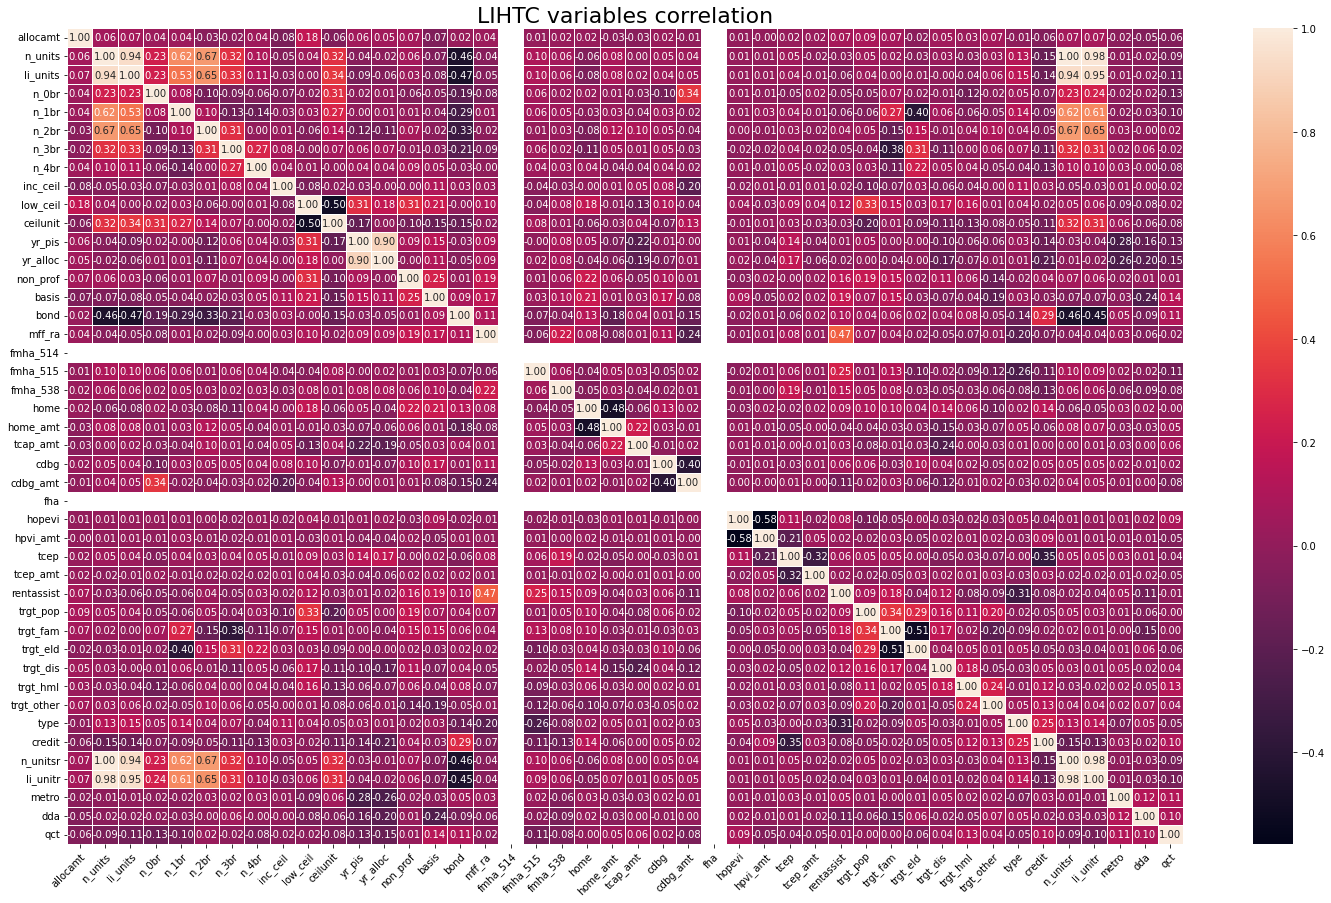

In [5]:
# Visualize variables on heat map

plt.figure(figsize=(25,15))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('LIHTC variables correlation', size=22);

In [6]:
df.corr()

,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct
allocamt,1.000000,0.060900,0.066670,0.036489,0.038723,-0.031583,-0.020905,0.044310,-0.078269,0.180675,-0.062667,0.057586,0.052382,0.066571,-0.067515,0.016010,0.035498,NaN,0.012578,0.020878,0.016809,-0.027444,-0.033076,0.022967,-0.008989,NaN,0.005121,-0.003649,0.016363,0.024281,0.073242,0.086146,0.065081,-0.024820,0.054835,0.028175,0.065746,-0.014920,-0.058256,0.065416,0.072418,-0.022905,-0.054815,-0.056883
n_units,0.060900,1.000000,0.940314,0.231137,0.623030,0.672937,0.321401,0.097487,-0.051665,0.039326,0.318358,-0.037136,-0.017578,0.064569,-0.069464,-0.459544,-0.036893,NaN,0.096717,0.062787,-0.057757,0.083104,0.004601,0.046654,0.042280,NaN,0.008563,0.005723,0.050359,-0.018995,-0.025659,0.049026,0.023191,-0.034960,0.025131,-0.028674,0.034602,0.125867,-0.153676,0.998673,0.980410,-0.013150,-0.023539,-0.088894
li_units,0.066670,0.940314,1.000000,0.233204,0.532492,0.653495,0.327310,0.109624,-0.029310,0.000915,0.343204,-0.091876,-0.056933,0.034521,-0.079310,-0.465914,-0.047135,NaN,0.104911,0.057005,-0.075536,0.083151,0.022237,0.042888,0.050152,NaN,0.010727,0.009686,0.036186,-0.014310,-0.059795,0.036829,0.002720,-0.006763,-0.004126,-0.035806,0.056361,0.151264,-0.138119,0.939043,0.952570,-0.005617,-0.022779,-0.110214
n_0br,0.036489,0.231137,0.233204,1.000000,0.082473,-0.100880,-0.086257,-0.059880,-0.066959,-0.023031,0.311891,-0.021892,0.007185,-0.059706,-0.054202,-0.189941,-0.077946,NaN,0.060462,0.016035,0.019887,0.006974,-0.034668,-0.096925,0.336412,NaN,0.013028,-0.007511,-0.052326,0.015982,-0.053292,-0.051673,0.065173,-0.022964,-0.011255,-0.118005,-0.020944,0.050636,-0.068090,0.231398,0.243147,-0.017659,-0.016035,-0.128989
n_1br,0.038723,0.623030,0.532492,0.082473,1.000000,0.099012,-0.125370,-0.142520,-0.028984,0.027427,0.271042,-0.004048,0.014163,0.013406,-0.040203,-0.289169,0.008829,NaN,0.063437,0.048657,-0.025990,0.029028,-0.038228,0.034587,-0.023081,NaN,0.006402,0.032548,0.038867,-0.009002,-0.061944,-0.055562,0.271143,-0.401839,0.063322,-0.057030,-0.046131,0.136023,-0.086189,0.623267,0.611202,-0.024627,-0.030209,-0.101178
n_2br,-0.031583,0.672937,0.653495,-0.100880,0.099012,1.000000,0.311840,0.000380,0.014945,-0.058186,0.138807,-0.120156,-0.111664,0.071488,-0.024701,-0.328521,-0.020733,NaN,0.012561,0.026569,-0.079381,0.123546,0.095673,0.049578,-0.044704,NaN,0.002612,-0.008078,0.029317,-0.015431,0.035100,0.047383,-0.153100,0.151703,-0.007504,0.037866,0.101099,0.043107,-0.051506,0.673970,0.647173,0.025714,-0.003295,0.022135
n_3br,-0.020905,0.321401,0.327310,-0.086257,-0.125370,0.311840,1.000000,0.267337,0.076625,-0.004097,0.069032,0.060928,0.074831,-0.008933,-0.027402,-0.208826,-0.085678,NaN,0.055528,0.017317,-0.106038,0.049646,0.009290,0.052351,-0.028929,NaN,-0.017949,-0.020443,0.038232,-0.023347,-0.048243,-0.041386,-0.379038,0.310333,-0.107550,0.003280,0.061604,0.071748,-0.114219,0.322315,0.314122,0.021703,0.055156,-0.015924
n_4br,0.044310,0.097487,0.109624,-0.059880,-0.142520,0.000380,0.267337,1.000000,0.039373,0.009642,-0.003002,0.042625,0.039119,0.087855,0.046653,-0.025061,-0.003954,NaN,0.041631,0.033758,0.043196,-0.035900,-0.035285,0.036883,-0.016358,NaN,0.009858,-0.011191,0.054496,-0.017222,0.034981,0.028957,-0.112198,0.218711,0.046380,0.035322,-0.051674,-0.042408,-0.132450,0.100339,0.099603,0.031203,-0.004986,-0.076250
inc_ceil,-0.078269,-0.051665,-0.029310,-0.066959,-0.028984,0.014945,0.076625,0.039373,1.000000,-0.077896,-0.020499,-0.031080,-0.000112,-0.003100,0.107943,0.028003,0.027305,NaN,-0.038225,-0.028850,-0.002331,0.011142,0.046205,0.076836,-0.202476,NaN,-0.016588,0.009564,-0.014306,0.005397,-0.018869,-0.101529,-0.070761,0.032318,-0.062987,-0.040180,-0.003162,0.105971,0.025315,-0.05056

In [7]:
def rankCorr(colName, minCorr=0.10):
    corr = df.corr()
    corr.sort_values(by=colName, ascending=False, inplace=True)
    relevantFeatCorr = corr[abs(corr[colName]) >= minCorr][colName][1:]
    print(relevantFeatCorr)


<AxesSubplot:xlabel='yr_alloc', ylabel='allocamt'>

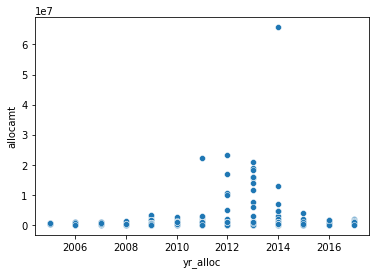

In [8]:
sns.scatterplot(data=df, x='yr_alloc', y='allocamt')

In [9]:
rankCorr('allocamt')

low_ceil    0.180675
Name: allocamt, dtype: float64


<AxesSubplot:xlabel='yr_alloc', ylabel='dda'>

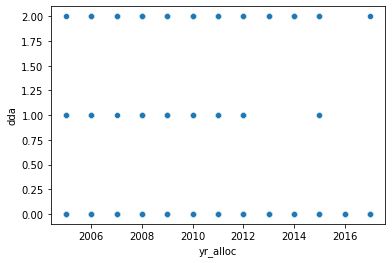

In [10]:
sns.scatterplot(data=df, x='yr_alloc', y='dda')

In [11]:
rankCorr('dda')

metro         0.119680
rentassist   -0.110883
trgt_fam     -0.149651
yr_pis       -0.159352
yr_alloc     -0.201236
basis        -0.242103
Name: dda, dtype: float64


In [12]:
# sns.kdeplot(data=df, x='yr_alloc', y='qct')

In [13]:
rankCorr('qct')

basis       0.137781
trgt_hml    0.125079
metro       0.113465
bond        0.112687
credit      0.101448
n_1br      -0.101178
fmha_515   -0.106843
li_units   -0.110214
yr_pis     -0.128289
n_0br      -0.128989
yr_alloc   -0.145819
Name: qct, dtype: float64


In [14]:
rankCorr('li_units')

li_unitr    0.952570
n_units     0.940314
n_unitsr    0.939043
n_2br       0.653495
n_1br       0.532492
ceilunit    0.343204
n_3br       0.327310
n_0br       0.233204
type        0.151264
n_4br       0.109624
fmha_515    0.104911
qct        -0.110214
credit     -0.138119
bond       -0.465914
Name: li_units, dtype: float64


In [15]:
rankCorr('bond')

credit      0.287305
home        0.134775
qct         0.112687
mff_ra      0.108955
type       -0.138080
cdbg_amt   -0.150876
ceilunit   -0.154602
home_amt   -0.183102
n_0br      -0.189941
n_3br      -0.208826
n_1br      -0.289169
n_2br      -0.328521
li_unitr   -0.453534
n_units    -0.459544
n_unitsr   -0.459711
li_units   -0.465914
Name: bond, dtype: float64


In [16]:
# sns.kdeplot(x=df['bond'], y=df['credit'])

bond: 1 ~ yes, 2 ~ no

credit: 1 ~ 30% of PV, 2 ~ 70% of PV, 3 ~ Both, 4 ~ TCEP only (Tax credit exchange program funds)

#### Regression analysis

allocamt, n_units, li_units, bond, credit

pecentage for each bedroom numbers

(n_units, li_units) ~ yr_alloc + bond + credit + allocamt + dda + basis + fmha_514 + fmha_515 + fmha_538

(allocamt, bond, credit) ~ yr_alloc + dad + u_units + per_1br + per_0br + per_2br + .. + var of interest

negative binomial for number of units, linreg for the rest (consider log transformations)

Negative binomial model for n_units, li_units
Linear for allocamt, log transform of the allocamt
Logit model for (bond, credit)

Reduce bond credit to 0/1

Probit

add qct as an independent variable for all models

create a categroical variable to combine bond and credit (e.g. yes bond with 30%, yes bond with 70%, nb with 30, no bond with 70%, no bond with both, nb to tcep, etc.)

Yes bond + 30% pv, yes bond 70% pv,  no bond + 30%, no bond 70%, no bond both, no bond TCEP only

In [332]:
# Relevant functions

def standardize(data, ddof=0):
    return (data - np.mean(data)) / np.std(data, ddof=ddof)

def getRMSE(true, pred):
    return np.sqrt(np.mean((true-pred)**2))

def getCoefs(X, y):

    """
        The ordinary least squares normal equations for optimal weights

    """ 

    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [325]:
# Cast 2/1 binary columns to 0/1

df['bond'] = df['bond'].replace(2, 0)

for col in df.columns:
    if 'fmha' in col:
        df[col] = df[col].replace(2, 0)

In [148]:
# Model 1: w0 + w1*u_units + w2*li_units + w3*bond + w4*credit = allocamt 

X1 = df[['li_units', 'bond', 'credit', 'allocamt']]
X1['bias'] = np.ones(X1.shape[0])

In [149]:
X1.head()

,li_units,bond,credit,allocamt,bias
793,40.0,0.0,2.0,353361.0,1.0
833,96.0,0.0,2.0,846300.0,1.0
840,40.0,0.0,2.0,444822.0,1.0
842,56.0,0.0,2.0,616777.0,1.0
843,56.0,0.0,2.0,200000.0,1.0


In [150]:
# X1['n_units'] = standardize(X1['n_units'])
X1['li_units'] = standardize(X1['li_units'])
# X1['credit'] = X1['credit'].replace({1: 1, 2: 1, 3: 1, 4: 0})

X1.dropna(inplace=True)

X1 = X1[X1['allocamt'] > 0]

y1 = np.log(X1['allocamt'])

X1.drop(columns=['allocamt'], inplace=True)


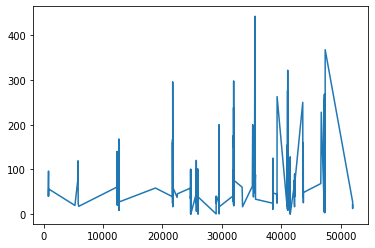

In [151]:
plt.plot(df['li_units'])

In [192]:
# Convert to an array of arrays

x1 = X1.values

In [193]:
# Get optimal weights

ws1 = np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

optimal weights = $(X^T X)^{-1} (X^T y)$

In [194]:
# wp = 'C:/Users/phuro/UCSD/ULI/H2H/ULI-UCSD_H2H/LIHTC_analysis/data/LIHTC/cleanExport.csv'
# df.to_csv(wp)

In [195]:
ws1

array([ 0.34670054, -0.38835502,  0.87411696, 12.25392933])

In [196]:
getRMSE(X1.dot(ws1), y1)

1.3750078176970066

In [197]:
np.mean(y1)

13.061101792168708

In [198]:
# Plot li_units and credit against allocation amount

x_1 = x1[:, 0]
x_2 = x1[:, 2]

fig = px.scatter_3d(x=x_1, y=x_2, z=y1)

fig.update_layout(
    scene = dict(
        xaxis_title='# low inc units',
        yaxis_title='credits',
        zaxis_title='allocation amt'),
        margin=dict(l=0, r=0, b=0, t=0
    )
)

x1_grid, x2_grid = np.meshgrid(
    np.linspace(min(x_1), max(x_1), 100), 
    np.linspace(min(x_2), max(x_2), 100)
)

X = np.column_stack([np.ones(len(x_1)), x_1, x_2])
ws =  np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y1))

yHat = ws[0] + ws[1]*x1_grid + ws[2]*x2_grid

fig.add_trace(
    go.Surface(x=x1_grid, y=x2_grid, z=yHat, opacity=0.5)
)

fig.show()

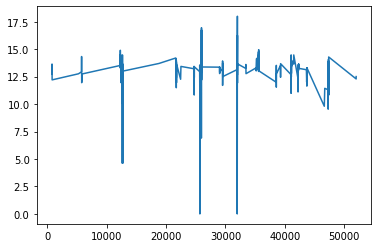

In [199]:
# sanity check

plt.plot(y1)

In [200]:
np.mean(y1)

13.061101792168708

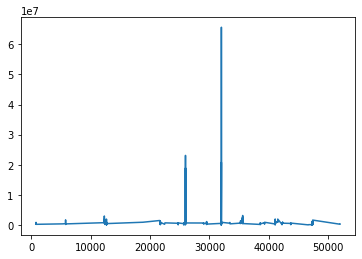

In [201]:
plt.plot(df['allocamt'])

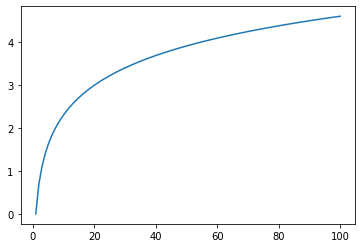

In [202]:
x = np.linspace(1, 100, 100)
plt.plot(x, np.log(x))

In [203]:
# Get bedroom numbers as a percentage

bedPercentages = defaultdict(list)
def getBedPercentages(row):
    total = row['n_0br'] + row['n_1br'] + row['n_2br'] + row['n_3br'] + row['n_4br']
    for i in range(5):
        bedPercentages[f'n_{i}br'].append(np.round(row[f'n_{i}br'] / total, 2))

df.apply(getBedPercentages, axis=1)

793      None
833      None
840      None
842      None
843      None
         ... 
47362    None
47365    None
51983    None
51984    None
51986    None
Length: 733, dtype: object

In [204]:
for key, item in bedPercentages.items():
    df[key[2:]] = item

In [205]:
df.head()

,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap_amt,cdbg,cdbg_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct,0br,1br,2br,3br,4br
793,353361.0,40.0,40.0,0.0,10.0,20.0,10.0,0.0,2.0,1.0,40.0,2007,2007.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1057610.0,1236940.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,40.0,40.0,1.0,0.0,2.0,0.0,0.25,0.50,0.25,0.0
833,846300.0,96.0,96.0,0.0,24.0,48.0,24.0,0.0,2.0,1.0,96.0,2009,2008.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,3691580.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,96.0,96.0,1.0,0.0,2.0,0.0,0.25,0.50,0.25,0.0
840,444822.0,40.0,40.0,0.0,12.0,28.0,0.0,0.0,2.0,1.0,40.0,2009,2009.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1857970.0,845160.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,40.0,40.0,1.0,0.0,2.0,0.0,0.30,0.70,0.00,0.0
842,616777.0,56.0,56.0,0.0,12.0,44.0,0.0,0.0,2.0,1.0,56.0,2009,2009.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2550010.0,1292290.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,56.0,56.0,1.0,0.0,1.0,0.0,0.21,0.79,0.00,0.0
843,200000.0,56.0,56.0,0.0,0.0,56.0,0.0,0.0,2.0,1.0,56.0,2009,2008.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2119730.0,4578970.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,56.0,56.0,1.0,0.0,2.0,0.0,0.00,1.00,0.00,0.0


In [206]:
# Model 2:
# (n_units, li_units) ~ 
# yr_alloc + bond + credit + allocamt + dda + basis + fmha_514 + fmha_515 + fmha_538

X2 = df[['yr_alloc', 'bond', 'credit', 'allocamt', 'dda', 'basis', 'fmha_514', \
    'fmha_515', 'fmha_538', 'n_units', 'li_units']]
X2.dropna(inplace=True)

In [207]:
# Feature matrix cleaning preprocessing

y2 = X2[['n_units', 'li_units']]
X2.drop(columns=['n_units', 'li_units'], inplace=True)
X2['credit'] = X2['credit'].replace({1:1, 2:1, 3:1, 4:0})
X2['dda'] = [0 if datum == 0 else 1 for datum in X2['dda']]

for col in X2.columns[-4:]:
    X2[col] = X2[col].replace(2, 0)

y2.head()

,n_units,li_units
793,40.0,40.0
833,96.0,96.0
840,40.0,40.0
842,56.0,56.0
843,56.0,56.0


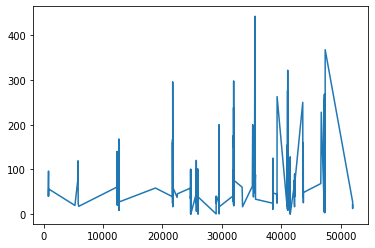

In [208]:
plt.plot(y2['li_units'])

In [209]:
X2.head()

,yr_alloc,bond,credit,allocamt,dda,basis,fmha_514,fmha_515,fmha_538
793,2007.0,0.0,1.0,353361.0,0,0.0,0.0,0.0,0.0
833,2008.0,0.0,1.0,846300.0,0,0.0,0.0,0.0,0.0
840,2009.0,0.0,1.0,444822.0,0,0.0,0.0,0.0,0.0
842,2009.0,0.0,1.0,616777.0,0,0.0,0.0,0.0,0.0
843,2008.0,0.0,1.0,200000.0,0,0.0,0.0,0.0,0.0


In [210]:
# Build pipeline for model 2 (linear regression)

mdl2_preproc = ColumnTransformer(
    transformers=[
        ('cate-cols', OneHotEncoder(), ['yr_alloc'])
    ], remainder='passthrough'
)

pl = Pipeline([
    ('preprocessor', mdl2_preproc),
    ('model', LinearRegression())
])

pl.fit(X2, y2)

# sm.GLM(y2, X2, family=sm.families.NegativeBinomial())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cate-cols', OneHotEncoder(),
                                                  ['yr_alloc'])])),
                ('model', LinearRegression())])

In [211]:
yHat = pl.predict(X2)

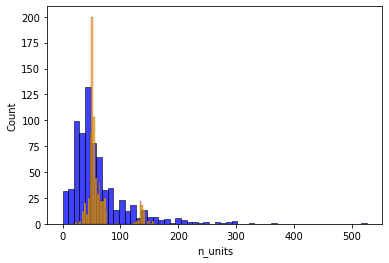

In [212]:
# Actual vs predicted n_units

sns.histplot(y2['n_units'], color='blue')
sns.histplot(yHat[:,0], color='orange')
plt.show()

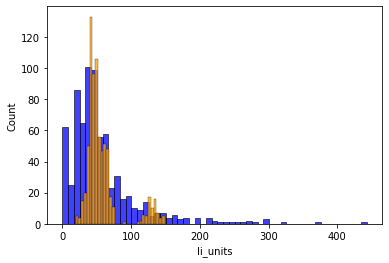

In [213]:
# Actual vs predicted li_units 

sns.histplot(y2['li_units'], color='blue')
sns.histplot(yHat[:,1], color='orange')
plt.show()

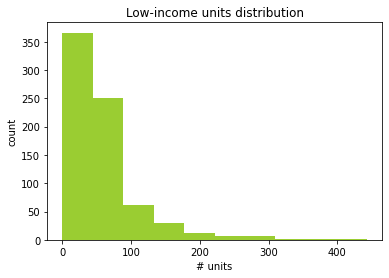

In [237]:
# Check for model appropriateness (we want to see non-negative and right-skew)

plt.hist(y2['li_units'], color='yellowgreen')
plt.title("Low-income units distribution")
plt.xlabel('# units')
plt.ylabel('count');

In [326]:
# Negative Binomial models

# Model (negbinomial): n_units ~ yr_alloc + bond + credit + allocamt + dda	+ \
# basis + fmha_514 + fmha_515 + fmha_538

mdl3 = sm.GLM(y2['n_units'], X2, family=sm.families.NegativeBinomial())
result = mdl3.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                n_units   No. Observations:                  733
Model:                            GLM   Df Residuals:                      725
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3730.7
Date:                Sat, 02 Mar 2024   Deviance:                       387.73
Time:                        05:32:08   Pearson chi2:                     412.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1040
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
yr_alloc       0.0021   9.46e-05     21.755      0.0

##### *Notes*: 
The model applies the logarithm to the predictor in modeling the target variable using the iterative reweighted least squares optimization method

**Highlights**: bond, fmha_538, fmha_515, credit 

In [224]:
# Model (negbinomial): li_units ~ yr_alloc + bond + credit + allocamt + dda	+ \
# basis + fmha_514 + fmha_515 + fmha_538

mdl4 = sm.GLM(y2['li_units'], X2, family=sm.families.NegativeBinomial())
result = mdl4.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               li_units   No. Observations:                  733
Model:                            GLM   Df Residuals:                      725
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3662.3
Date:                Sat, 02 Mar 2024   Deviance:                       591.01
Time:                        03:33:07   Pearson chi2:                     436.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1164
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
yr_alloc       0.0020   9.46e-05     21.596      0.0

In [222]:
# Linear Regression models

# Model: allocamt ~ li_units + bond + credit + bias

x5 = X1
# x5 = sm.add_constant(x5, prepend=False)

mdl5 = sm.OLS(
    endog=y1,
    exog=x5
)

res = mdl5.fit()


print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               allocamt   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     14.73
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.57e-09
Time:                        03:31:27   Log-Likelihood:                -1264.8
No. Observations:                 728   AIC:                             2538.
Df Residuals:                     724   BIC:                             2556.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
li_units       0.3467      0.058      5.998      0.0

##### *Notes*: 

**Highlights**: li_units, bond, credit (all appears to be significant predictors of allocation amount)

In [238]:
# sanity check
ws1

array([ 0.34670054, -0.38835502,  0.87411696, 12.25392933])

9.822646657571624


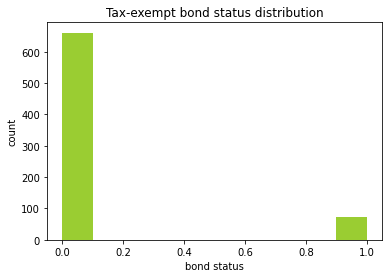

In [251]:
# Predicting bond and credit statuses

plt.hist(df['bond'], color='yellowgreen')
plt.title('Tax-exempt bond status distribution')
plt.xlabel('bond status')
plt.ylabel('count');

print((df[df['bond'] == 1].shape[0] / df.shape[0])*100)

Projects that received tax-exempt bond only constitute about 10% of the dataset, there is potential for issues due to data imbalance

In [252]:
df.columns

Index(['allocamt', 'n_units', 'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br',
       'n_4br', 'inc_ceil', 'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc',
       'non_prof', 'basis', 'bond', 'mff_ra', 'fmha_514', 'fmha_515',
       'fmha_538', 'home', 'home_amt', 'tcap_amt', 'cdbg', 'cdbg_amt', 'fha',
       'hopevi', 'hpvi_amt', 'tcep', 'tcep_amt', 'rentassist', 'trgt_pop',
       'trgt_fam', 'trgt_eld', 'trgt_dis', 'trgt_hml', 'trgt_other', 'type',
       'credit', 'n_unitsr', 'li_unitr', 'metro', 'dda', 'qct', '0br', '1br',
       '2br', '3br', '4br'],
      dtype='object')

In [288]:
# Model: bond ~ yr_alloc + dda + li_units + 0br + 1br + 2br + 3br + 4br 
# The #br are percentages of #-bedroom units

X6 = df[['yr_alloc', 'dda', 'li_units', '0br', '1br', '2br', '3br', '4br']]
y6 = df['bond']

In [289]:
# Fill empty bedroom percentages with 0

X6.fillna(0, inplace=True)

In [290]:
link6 = sm.families.links.Logit()

In [291]:
X6 = sm.add_constant(X6)
mdl6 = sm.GLM(y6, X6, family=sm.families.Binomial(link=link6))
result = mdl6.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   bond   No. Observations:                  733
Model:                            GLM   Df Residuals:                      724
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -166.70
Date:                Sat, 02 Mar 2024   Deviance:                       333.39
Time:                        05:08:47   Pearson chi2:                     588.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1710
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.8506    113.510     -2.862      0.0

##### *Notes*:
Model structure:
- The logit link is the inverse of the logistic function

Takeaways:
- dda (difficulty dev. area) seems to be an informative predictor, also accomodated with a lower p-value (statistically significant)
- The bedroom percentages have high coefficients but also high p-values, they may not be statistically significant, need more EDA on these features to see why

In [298]:
X6.corr()

,const,yr_alloc,dda,li_units,0br,1br,2br,3br,4br
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_alloc,NaN,1.000000,-0.201236,-0.056933,-0.019778,0.023617,-0.122323,0.125489,-0.008213
dda,NaN,-0.201236,1.000000,-0.022779,-0.014489,-0.056921,-0.021319,0.071857,0.060222
li_units,NaN,-0.056933,-0.022779,1.000000,0.113240,0.052100,0.062826,-0.112445,-0.158945
0br,NaN,-0.019778,-0.014489,0.113240,1.000000,-0.058068,-0.233162,-0.139256,-0.072775
1br,NaN,0.023617,-0.056921,0.052100,-0.058068,1.000000,-0.480557,-0.538402,-0.293233
2br,NaN,-0.122323,-0.021319,0.062826,-0.233162,-0.480557,1.000000,-0.120143,-0.269329
3br,NaN,0.125489,0.071857,-0.112445,-0.139256,-0.538402,-0.120143,1.000000,0.005477
4br,NaN,-0.008213,0.060222,-0.158945,-0.072775,-0.293233,-0.269329,0.005477,1.000000


In [292]:
_ = X6.copy()
_['target'] = y6
_.corr()['target']

const            NaN
yr_alloc    0.046098
dda         0.093775
li_units    0.465914
0br         0.138382
1br         0.026645
2br         0.005428
3br        -0.056746
4br        -0.067888
target      1.000000
Name: target, dtype: float64

In [293]:
X6['yr_alloc'].nunique()

13

Try the same model with one-hot encodings for the year allocation feature next

In [297]:
# Try with probit link function

link7 = sm.families.links.Probit()
mdl7 = sm.GLM(y6, X6, family=sm.families.Binomial(link=link7))
result = mdl7.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   bond   No. Observations:                  733
Model:                            GLM   Df Residuals:                      724
Model Family:                Binomial   Df Model:                            8
Link Function:                 Probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -164.74
Date:                Sat, 02 Mar 2024   Deviance:                       329.48
Time:                        05:10:00   Pearson chi2:                     622.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1754
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -161.6519     58.162     -2.779      0.0

##### *Notes*:
Model structure:
- The probit link function transforms the predictions into probabilities using the inverse of the CDF of the standard normal distribution

Takeaways:
Similar to the same model with logit link function
- dda (difficulty dev. area) seems to be an informative predictor, also accomodated with a lower p-value (statistically significant)
- The bedroom percentages have high coefficients but also high p-values, they may not be statistically significant, need more EDA on these features to see why

In [307]:
# Get predicted probabilities of each obs being class 1 (has bond)

pred7 = result.predict(X6)

In [312]:
# Get accuracy

pred7 = pred7 > 0.5
np.mean((pred7 == y6))

0.9045020463847203

In [316]:
# Get accuracy if we predict 0 for everything 
np.mean(np.array([0]*X6.shape[0]) == y6)

0.9017735334242838

4.092769440654844


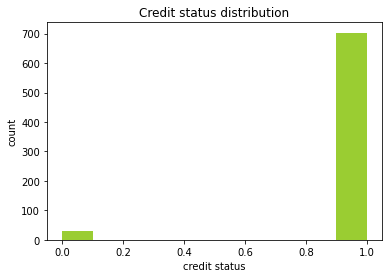

In [318]:
# Examine credit value distribution

df['credit'] = df['credit'].replace({1:1, 2:1, 3:1, 4:0})
plt.hist(df['credit'], color='yellowgreen')
plt.title('Credit status distribution')
plt.xlabel('credit status')
plt.ylabel('count');

print((df[df['credit'] == 0].shape[0] / df.shape[0])*100)

In [350]:
# Put a couple of informative features together
# Model: allocamt ~ bond + credit + dda + li_units + fmha_538

X8 = df[['bond', 'credit', 'dda', 'li_units', 'fmha_538']]
X8['bias'] = np.ones(X8.shape[0])
y8 = df['allocamt']

# ordinary least squares
ws8 = getCoefs(X8, y8)
ws8

array([-625774.38727602,  388130.51825232, -270881.22008707,
          5831.12133885, -293595.70920732,  454751.77589031])

In [351]:
# Get RMSE

pred8 = X8 @ ws8
getRMSE(y8, pred8)

3294075.2420077017

In [353]:
# sanity check
_ = X8.copy()
_['target'] = y8
_.corr()

,bond,credit,dda,li_units,fmha_538,bias,target
bond,1.000000,0.068179,0.093775,0.465914,-0.036797,NaN,-0.016010
credit,0.068179,1.000000,0.004641,-0.014552,-0.164552,NaN,0.019447
dda,0.093775,0.004641,1.000000,-0.022779,0.088653,NaN,-0.054815
li_units,0.465914,-0.014552,-0.022779,1.000000,-0.057005,NaN,0.066670
fmha_538,-0.036797,-0.164552,0.088653,-0.057005,1.000000,NaN,-0.020878
bias,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,-0.016010,0.019447,-0.054815,0.066670,-0.020878,NaN,1.000000


In [ ]:
# Plot li_units and credit against allocation amount

x_1 = x1[:, 0]
x_2 = x1[:, 2]

fig = px.scatter_3d(x=x_1, y=x_2, z=y1)

fig.update_layout(
    scene = dict(
        xaxis_title='# low inc units',
        yaxis_title='credits',
        zaxis_title='allocation amt'),
        margin=dict(l=0, r=0, b=0, t=0
    )
)

x1_grid, x2_grid = np.meshgrid(
    np.linspace(min(x_1), max(x_1), 100), 
    np.linspace(min(x_2), max(x_2), 100)
)

X = np.column_stack([np.ones(len(x_1)), x_1, x_2])
ws =  np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y1))

yHat = ws[0] + ws[1]*x1_grid + ws[2]*x2_grid

fig.add_trace(
    go.Surface(x=x1_grid, y=x2_grid, z=yHat, opacity=0.5)
)

fig.show()